In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [19]:
import os

In [ ]:
### Checks if a directory exists or not and creates it if it doesn't.

if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

In [26]:
### Tried to scan directory animals and print each entry in the directory.

path='./Animals/'

with os.scandir(path) as it:
    for entry in it:
        if not entry.name.startswith('.') and entry.is_file():
            print(entry.name)

In [ ]:
### Attempts to create train and test folders based on the folders within the directory
### Second part tries to take half the files in the original folder and move them into one of the new directories
### Then tries to take the other half of the files in the original folder and move them into the other new directory

# for folder in directory:
#     os.mkdir(foldername+'_test')
#     os.mkdir(foldername+'_train')
#     num_files = len(directory) #to get number of files in the directory
#     test_files = os.cp(directory[0:(num_files-1)])
#     train_files = os.cp(directory[num_files:])
#     os.mv(test_files /foldername_test/)
#     os.mv(train_files /foldername_train/)
    
    
### Should end with 60 directories...the original 20 plus a _train and _test version for each folder.
### The train and test folders should each include half the files found in the original folder.

In [27]:
import shutil

In [ ]:
shutil.copy2('', dest)

In [72]:
animal_list = []
for folder in os.listdir(path='./Data'):
    animal_list.append(folder)
    



In [82]:
len(animal_list)

20

In [86]:
len(os.listdir(path='./Data/'+(animal_list[3])))

759

In [51]:
for i in os.listdir(path='./Data'):
    print(len(os.listdir(path='./Data/'+i)))


728
728


NotADirectoryError: [Errno 20] Not a directory: './Data/.DS_Store'

In [43]:
len(os.listdir(path='./Data'))

23

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


def create_img_dict():

    data_dir = '/Users/basselhaidar/Desktop/Final Project/skin-cancer-mnist-ham10000/'
    # Create dataframe and profile raw data
    raw_metadata_df = pd.read_csv(data_dir + 'HAM10000_metadata.csv')
    # Save the directory path of HAM10000_images_part_1 and HAM10000_images_part_2
    image_part1_dir = '/Users/basselhaidar/Desktop/Final Project/skin-cancer-mnist-ham10000/HAM10000_images_part_1/'
    image_part2_dir = '/Users/basselhaidar/Desktop/Final Project/skin-cancer-mnist-ham10000/HAM10000_images_part_2/'
    # Save the path of the images into their respective lists
    image_part_1_list = [image_part1_dir + image_path for image_path in os.listdir(image_part1_dir)]
    image_part_2_list = [image_part2_dir + image_path for image_path in os.listdir(image_part2_dir)]
    # Merge both lists
    all_image_list = list(image_part_1_list + image_part_2_list)
    print('Total number of images = {}'.format(len(all_image_list)))
    # Create a dictionnary key : 'name of image' and value : 'file path of image' 
    image_dict = {os.path.splitext(os.path.basename(image_path))[0]: image_path for image_path in all_image_list}
    len(image_dict) # both the list and dict display the correct total number of images
    # Check path of one image in the dictionnary
    print('Check path of ISIC_0025030.jpg = {}'.format(image_dict['ISIC_0025030']))
    
    return raw_metadata_df, image_dict

def set_df():
    # Create dictionary with the diagnostic categories of pigmented lesions
    lesion_cat_dict = {
        
        'akiec': 'Actinic keratoses',
        'bcc': 'Basal cell carcinoma',
        'bkl': 'Benign keratosis-like lesions ',
        'df': 'Dermatofibroma',
        'mel': 'Melanoma',
        'nv': 'Melanocytic nevi',
        'vasc': 'Vascular lesions'
    }

    # Make a copy of the dataframe as we will be adding new columns
    df, img_dict = create_img_dict()


    # Create new column file_path and use the image_id as the key of image_dict and map 
    # its corresponding value to get the path for the image
    df['file_path'] = df['image_id'].map(img_dict.get)

    # Create new column category_name and use dx as the key to lesion_cat_dict and map 
    # it to its corresponding value to get the lesion name
    df['category_name'] = df['dx'].map(lesion_cat_dict.get)

    # Create new column category_id and assign the integer codes 
    # of the category_name that was transformed into a pandas categorical 
    df['category_id'] = pd.Categorical(df['category_name']).codes

    # fill age null values by the mean age
    df.age.fillna(df.age.mean(), inplace=True)
    return df

def sns_countplot(df, col_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 6)
    sns.countplot(x=col_name, data=df, ax=ax);
    plt.show();
    
'''def copy_images(id_num, df=metadata_df, col_name='category_id'):
    all_cat_idx = np.array(df[df[col_name] == id_num].index) # All indices of a category
    n_tr = np.ceil(len(df[df[col_name] == id_num].index) * 0.8) # Use 80% 
    indices = np.random.choice(all_cat_idx, int(n_tr), replace=False) # train + val indices
    indices_tr = indices[:int(np.ceil(n_tr * 0.8))] # train indices 80%  
    indices_val = indices[int(np.ceil(n_tr * 0.8)):] # validation indices 20%
    train_cat = df[np.isin(df.index, indices_tr)].reset_index() # train rows from df
    val_cat = df[np.isin(df.index, indices_val)].reset_index()  # validation rows from df  
    
    
    train_destination = '/Users/basselhaidar/Desktop/Final Project/train_dir/'+ str(id_num)
    test_destination = '/Users/basselhaidar/Desktop/Final Project/test_dir/'+ str(id_num)
    valid_destination = '/Users/basselhaidar/Desktop/Final Project/valid_dir/'+ str(id_num)
    
    for row in range(train_cat.shape[0]):
        copy2(train_cat.loc[row, 'file_path'], train_destination)
    
    for row in range(val_cat.shape[0]):
        copy2(val_cat.loc[row, 'file_path'], valid_destination)
        
        
    test_idx = all_cat_idx[~np.isin(all_cat_idx, indices)]
    test_cat = df.iloc[test_idx, :].reset_index()
    for row in range(len(test_idx)):
        copy2(test_cat.loc[row, 'file_path'], test_destination)'''
'''
# fill age null values by the mean age
metadata_df.age.fillna(metadata_df.age.mean(), inplace=True)

fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
metadata_df['category_name'].value_counts().plot(kind='bar', ax=ax1);



metadata_df.category_name.value_counts()

'''

In [2]:
# Set up data into train and test directories with folders of bobcat and not_bobcat
train_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/'#348 bobcat, 340 not_bobcat
test_data_dir = '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/'#348 bobcat, 340 not_bobcat

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), batch_size=340)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), batch_size=340)

# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 685 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


/anaconda3/lib/python3.7/site-packages/PIL/Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 85 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 93 bytes but only got 0. Skipping tag 33285
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 141 bytes but only got 0. Skipping tag 37386
  " Skipping tag %s" % (size, len(data), tag))
/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 149 bytes bu

In [3]:
# get all the data in the directory split/test, and reshape them
data_te = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/test/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123)

Found 685 images belonging to 2 classes.


In [4]:
data_tr = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        '/Users/j.markdaniels/Downloads/final_proj_data/bobcat_cougar_data/train/', 
        target_size=(224, 224), 
        batch_size = 340, 
        seed = 123) 

Found 680 images belonging to 2 classes.


In [5]:
#split images and labels
images_tr, labels_tr = next(data_tr)

In [6]:
#split images and labels
images_te, labels_te = next(data_te)

In [7]:
images = np.concatenate((images_tr, images_te))

In [8]:
labels = np.concatenate((labels_tr[:,0], labels_te[:,0]))

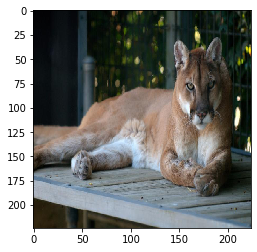

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[23])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=123)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [23]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (1, 1), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.BatchNormalization())
# 64 bias parameters
# 64 * (3 * 3 * 3) weight parametrs
# Output is 64*224*224
cnn.add(layers.MaxPooling2D((2, 2)))
#Output is 64*112*112
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224,  3)))
cnn.add(layers.BatchNormalization())
#32 bias parameters
#32 * (3*3*64)
#Output is 32*112*112 
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [24]:
cnn1 = cnn.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 435 samples, validate on 109 samples
Epoch 1/100
435/435 [==============================] - 53s 122ms/step - loss: 1.2094 - acc: 0.6046 - val_loss: 0.6238 - val_acc: 0.6514
Epoch 2/100
435/435 [==============================] - 47s 108ms/step - loss: 0.5378 - acc: 0.7264 - val_loss: 0.6707 - val_acc: 0.6606
Epoch 3/100
435/435 [==============================] - 48s 110ms/step - loss: 0.4099 - acc: 0.8069 - val_loss: 0.5825 - val_acc: 0.7431
Epoch 4/100
435/435 [==============================] - 49s 112ms/step - loss: 0.3245 - acc: 0.8690 - val_loss: 0.7094 - val_acc: 0.6514
Epoch 5/100
435/435 [==============================] - 48s 110ms/step - loss: 0.2580 - acc: 0.9103 - val_loss: 0.6318 - val_acc: 0.7339
Epoch 6/100
435/435 [==============================] - 48s 111ms/step - loss: 0.1598 - acc: 0.9379 - val_loss: 0.6218 - val_acc: 0.7431
Epoch 7/100
435/435 [==============================] - 48s 110ms/step - loss: 0.1187 - acc: 0.9494 - val_loss: 0.7877 - val_acc: 0.7523
Ep

In [25]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization_2 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 32)        18464     
__________

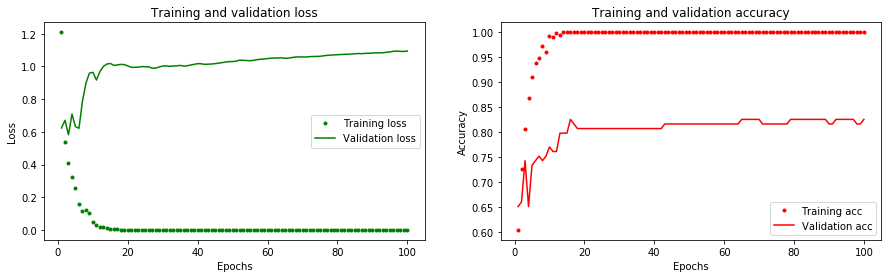

In [26]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

136/136 [==============================] - 6s 44ms/step
[6.323382405607008e-05, 1.0] [0.785735193420859, 0.8235294117647058]


In [29]:
cnn.save('cnn_first_draft.h5')